# Shareholder deck; data miner

In [1]:
import os
PWD = "/Users/antongolles/Documents/Work/ITU-Research/"
relative_location = "data/Shareholder_decks/"
list_dir = os.listdir(PWD+relative_location)

def get_company_names(list_dir):
    companies = []
    for i in list_dir:
        if len(i.split('.'))==1:
            companies.append(i)
    return companies


def get_text_dicts(list_dir):
    text_dicts = []
    for i in list_dir:
        if len(i.split('.npz'))==2:
            text_dicts.append(i)
    return text_dicts

companies = get_company_names(list_dir)
text_dicts = get_text_dicts(list_dir)
companies, text_dicts

(['twitter',
  'costco',
  'pepsico',
  'amazon',
  'google',
  'microsoft',
  'broadcom',
  'tesla',
  'meta',
  'cisco',
  'adobe'],
 ['text_from_shareholder_decks_2022-02-22.npz',
  'text_from_shareholder_decks_2022-02-15.npz',
  'text_from_shareholder_decks_2022-02-10.npz'])

## Load and extract text

In [2]:
import os
from datetime import date
from pdfminer.high_level import extract_text
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

#companies = ['tesla', 'google', 'microsoft', "twitter", "amazon"]
#PWD = "/Users/antongolles/Documents/Work/ITU-Research/"
#relative_location = "data/Shareholder_decks/"

def make_dictionary(companies, PWD, relative_location, build_on_date='2022-02-22'):
    
    #I dont wanna do this whole thing again... every time i add more data...
    
    if build_on_date != None:
        file = np.load(relative_location+f'text_from_shareholder_decks_{build_on_date}.npz', allow_pickle=True)
        dictionary = file[file.files[0]].item()

    else:
        dictionary = {}
    for company in companies:
        report_filenames = os.listdir(PWD+relative_location+company)
        if company in dictionary.keys():
            pass
        else:
            dictionary[company] = {}
        for report_filename in tqdm(report_filenames):
            if report_filename[:-4] in dictionary[company].keys():
                print('already in dataset', relative_location+company+'/'+report_filename)
            elif report_filename[-4:] == '.pdf':
                try:
                    #print(relative_location+company+'/'+report_filename)
                    text = extract_text(relative_location+company+'/'+report_filename)
                    dictionary[company][report_filename[:-4]] = {'text':text}
                except:
                    print('ERROR:', relative_location+company+'/'+report_filename)
            else:
                print('not a pdf', relative_location+company+'/'+report_filename)
    date_today = str(date.today())
    np.savez(relative_location+f'text_from_shareholder_decks_{date_today}.npz', dictionary)

In [3]:
#make_dictionary(companies, PWD, relative_location)

In [4]:
text_dicts

['text_from_shareholder_decks_2022-02-22.npz',
 'text_from_shareholder_decks_2022-02-15.npz',
 'text_from_shareholder_decks_2022-02-10.npz']

In [5]:
date_today = str(date.today())
date_latest = '2022-02-22'

file = np.load(relative_location+f'text_from_shareholder_decks_{date_latest}.npz', allow_pickle=True)
dictionary = file[file.files[0]].item()

In [6]:
dictionary['google']['google_2020_Q2']['scale']

KeyError: 'scale'

## Look for key words

In [ ]:
dbs_re_string = r"\bdigital business strategy\b|\bpure\s*play\b|\bdigital resource\b|\big data\b|\btransfunctional\b"
scope_re_string = r"\bdigital tech\w+\b|\bdigital product\w+\b|\bvirtual client network\w+\b|\bdifferential business value\b|\bdata\s*driven\b|\bdata driven\b|\bdatadriven\b|\bplatform\b|\binterfirm it capabilities\b|\binterfirm\b|\binformation exchange\b|\bconnectivity metric\w+\b|\binformation metric\w+\b|\bdynamic ecosystem\w+\b|\bdigital agility\b|\bcross functional\b|\bmulti disciplin\w+\b|\bcross disciplin\w+\b|\bcollaboration\b|\bdigital product\b|\bdigital service\b|\bdigital ecosystem\b|\bdigital partner\w+\b" 
scale_re_string = r"\bintelligent platform\b|\bmachine learning\b|\bartificial intelligence\b|\bit infrastructure\b|\bai\b|\bdata management\b|\bshared system\w+\b|\bdatabase management\b|\bhyperconnected\b|\bmulticloud\b|\bcloud\b|\bcloud computing\b|\bvirtual resource\b|\bshared digital asset\w+\b|\bdigital assetw+\b|\bnetwork effect\w+\b|\bapi\b|\application programming interface\w+|\bmulitsided platform\w+\b|\bnetwork access\b|\belastic resource\b|\binformation abundance\b|\bbig data\b|\binternet of things\b|\biot\b|\bnetwork effect\b|\bdigital platform\b|\bconnectivity\b|\bdata accessibility\b|\boutsourcing\b" 
speed_re_string = r"\bcommand center\b|\badoption\b|\bautomated network\w+\b|\binterfirm network\b|\bfastmover advantage\b|\bcomplementary product\b|\bdynamic realignment\b|\bdynamic supply chain\b|\bagility\b|\bpartner program\w+\b|\bproduct launch\w+\b|\baccelerat\w+\b|\bdata driven decision making\b|\bnetwork formation\b|\bproduct availablity\b|\bdigital information flow\w+\b|\brealtime\b|\breal time\b|\bdata optimiz\w+\b|\bdigital optim\w+\b|\bnetwork formation\b"
source_re_string = r"\bmultisided revenue model\w+\b|\bmultisided business model\w+\b|\bmultisided\b|\bcoordinated business model\w+\b|\bdigital architecture\b|\binterdependent ecosystem\w+\b|\binterdepend\w+\b|\binfluence advertis\w+\b|\bcontrol advertise\w+\b|\bdigital supply chain\b|\bdigital value chain\b|\bdigital business model\b|\bcoordination\b|\bcocreat\w+\b|\bco creat\w+\b|\bpersonaliz\w+\b|\bredistribution\b|\binteraction\w+\b|\bdigital space\b|\bdigital moneti\w+\b"

In [ ]:
import re

def count_re_matches(re_string, string):
    return len(re.findall(re_string, string))

def count_re_matches_diff(re_string, string):
    return len(set(re.findall(re_string, string)))

In [ ]:
count_re_matches(dbs_re_string,
                 dictionary['google']['google_2021_Q1']['text'])

In [20]:
companies = dictionary.keys()
for company in companies:
    reports = dictionary[company].keys()
    for report in reports:
        string = dictionary[company][report]['text']
        for re_string, name  in zip([dbs_re_string, scope_re_string, 
                                 scale_re_string, speed_re_string, 
                                 source_re_string], 
        "dbs, scope, scale, speed, source".split(', ')):
            count = count_re_matches_diff(re_string, string)
            #print(name,count)
            dictionary[company][report][name] = count

## convert to DataFrame and format


In [21]:
df = pd.concat({k: pd.DataFrame(v).T for k, v in dictionary.items()}, axis=0).drop(columns=['text'])
df_2 = df.copy().reset_index()

In [22]:
df

dbs scope scale speed source
tesla tesla_2020_Q1   0     0     0     0      0
      tesla_2020_Q2   0     3     1     0      0
      tesla_2020_Q3   0     0     0     2      1
      tesla_2020_Q4   0     0     0     2      0
      tesla_2021_Q3   0     0     0     1      0

In [23]:
def get_yearMonth(string):
    splitted = string.split('_')
    year = int(splitted[1])
    month = (int(splitted[2][-1]))*3

    time_stamp = date(year,month,1)
    return time_stamp

In [24]:
df_2['level_2'] = df_2['level_1'].apply(get_yearMonth)
df_2.rename({'level_2': 'period', 'level_0':'company'}, axis=1, inplace=True)

In [25]:
df_2 = df_2.groupby(by=['period', 'company']).sum()
df_2.to_csv('data/results_dataframe.csv')

In [26]:
df_2


level_1  dbs  scope  scale  speed  source
period     company                                                       
2018-03-01 amazon        amazon_2018_Q1    0      2      5      5       2
           pepsico      pepsico_2018_Q1    0      0      0     10       0
2018-06-01 amazon        amazon_2018_Q2    0      1     12      3       2
           pepsico      pepsico_2018_Q2    0      0      0     11       0
2018-09-01 amazon        amazon_2018_Q3    0      0      8      2       1
...                                 ...  ...    ...    ...    ...     ...
2021-12-01 pepsico      pepsico_2021_Q4    0      0      0      2       0
           tesla          tesla_2021_Q4    0      0      0      3       0
           twitter      twitter_2021_Q4    0      6      2     10       7
2022-03-01 costco        costco_2022_Q1    0      0      0      0       0
           microsoft  microsoft_2022_Q1    0      0     16      2       0

[98 rows x 6 columns]

## Vizualization

In [27]:
df = pd.read_csv('data/results_dataframe.csv')#, index_col=[0,1])

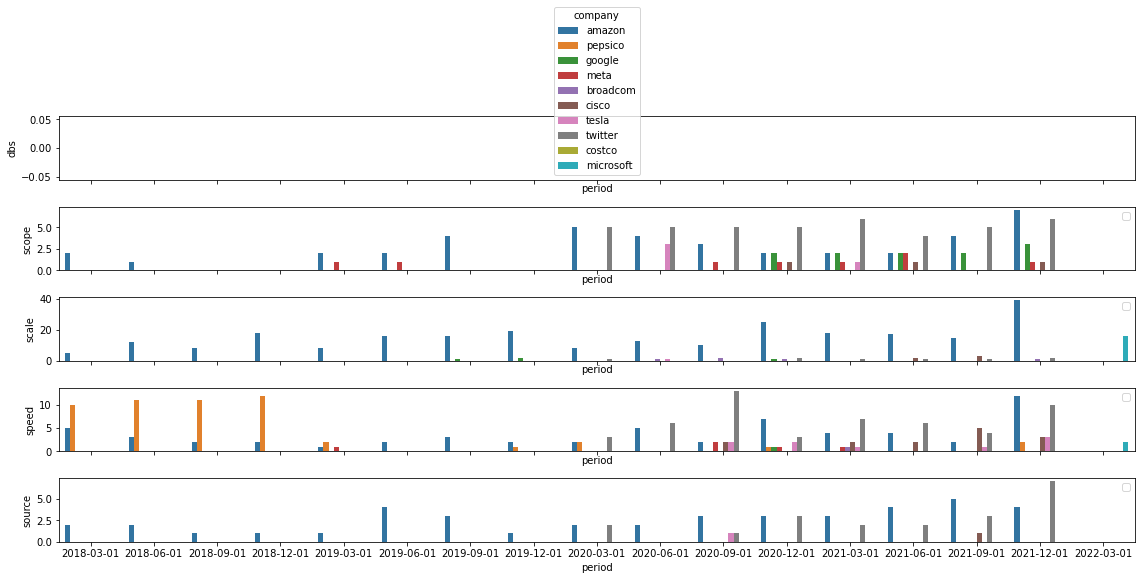

In [28]:
fig, ax = plt.subplots(5,1, figsize=(16,8), sharex=True)

sns.barplot(data=df,x='period',y='dbs', hue='company', ax=ax[0],)

sns.barplot(data=df,x='period',y='scope', hue='company', ax=ax[1])
sns.barplot(data=df,x='period',y='scale', hue='company', ax=ax[2])
sns.barplot(data=df,x='period',y='speed', hue='company', ax=ax[3])
sns.barplot(data=df,x='period',y='source', hue='company', ax=ax[4])

[ax[i].legend([]) for i in range(1,5)]

plt.tight_layout()

# Performance

In [32]:
dictionary['google']['google_2020_Q4']['text'].split('\n')

['Alphabet Announces Fourth Quarter and Fiscal Year 2020 Results',
 '',
 'MOUNTAIN  VIEW,  Calif.  –  February  2,  2021  –  Alphabet  Inc.  (NASDAQ:  GOOG,  GOOGL)  today  announced ',
 'financial results for the quarter and fiscal year ended December 31, 2020.',
 '',
 'Sundar  Pichai,  CEO  of  Google  and Alphabet,  said:  “Our  strong  results  this  quarter  reflect  the  helpfulness  of  our ',
 'products  and  services  to  people  and  businesses,  as  well  as  the  accelerating  transition  to  online  services  and  the ',
 'cloud. Google succeeds when we help our customers and partners succeed, and we see significant opportunities to ',
 'forge meaningful partnerships as businesses increasingly look to a digital future.”',
 '',
 'Ruth  Porat,  CFO  of  Google  and Alphabet,  said:  “Our  strong  fourth  quarter  performance,  with  revenues  of  $56.9 ',
 'billion, was driven by Search and YouTube, as consumer and business activity recovered from earlier in the year. ',
 'G